In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np
import math
from keras import Sequential
from keras.src.applications import VGG16, VGG19
from keras.src.callbacks import ModelCheckpoint
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.src.optimizers.legacy.rmsprop import RMSprop
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from keras.src.preprocessing.image import ImageDataGenerator
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

In [5]:
cat_train_dir = "./img/train/cat"
cat_validation_dir = "./img/validation/cat"
cat_test_dir = "./img/test/cat"

dog_train_dir = "./img/train/dog"
dog_validation_dir = "./img/validation/dog"
dog_test_dir = "./img/test/dog"

In [6]:
print(f"Cat train images: {len(os.listdir(cat_train_dir))}")
print(f"Cat validation images: {len(os.listdir(cat_validation_dir))}")
print(f"Cat test images: {len(os.listdir(cat_test_dir))}")

print(f"Dog train images: {len(os.listdir(dog_train_dir))}")
print(f"Dog validation images: {len(os.listdir(dog_validation_dir))}")
print(f"Dog test images: {len(os.listdir(dog_test_dir))}")

Cat train images: 148
Cat validation images: 43
Cat test images: 32
Dog train images: 148
Dog validation images: 43
Dog test images: 32


In [7]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.7, 1.3],
    zoom_range=0.2,
    fill_mode="nearest",
    shear_range=0.2,
    rescale=1. / 255.,
    rotation_range=20
)

validation_datagen = ImageDataGenerator(rescale=1. / 255.)

train_generator = train_datagen.flow_from_directory(directory="./img/train",
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode="binary")

validation_generator = validation_datagen.flow_from_directory(directory="./img/validation",
                                                              target_size=(150, 150),
                                                              batch_size=32,
                                                              class_mode="binary")

Found 296 images belonging to 2 classes.
Found 86 images belonging to 2 classes.


In [9]:
def display_augmented_images(animal, idx):
    fnames = [os.path.join("./img/train/" + animal, fname) for fname in os.listdir("./img/train/" + animal)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=(150, 150))
    print(img_path)

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    rows, cols = 3, 4
    fig = make_subplots(rows=rows, cols=cols)

    i = 0
    for batch in train_datagen.flow(x, batch_size=1):
        img = image.array_to_img(batch[0])

        fig.add_trace(
            go.Image(z=img),
            row=i // cols + 1,
            col=i % cols + 1
        )

        i += 1
        if i >= rows * cols:
            break

    fig.update_layout(
        width=900,
        height=600,
        title='Augmented images',
        grid={'rows': rows, 'columns': cols},
    )

    fig.show()

# display_augmented_images("cat", 100)

IndexError: list index out of range

In [2]:
model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model.add(conv_base)
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
conv_base.trainable = False

model.summary()

NameError: name 'Sequential' is not defined

In [106]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

batch_size = 32
steps = math.ceil((len(os.listdir(cat_train_dir)) + len(os.listdir(dog_train_dir))) / batch_size)
v_steps = math.ceil((len(os.listdir(cat_validation_dir)) + len(os.listdir(dog_validation_dir))) / batch_size)

mc = ModelCheckpoint(filepath="model4.keras", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps,
                    validation_steps=v_steps,
                    epochs=20,
                    callbacks=[mc])

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.7068 - accuracy: 0.6250
Epoch 1: val_accuracy improved from -inf to 0.79070, saving model to model4.keras
10/10 [==============================] - 46s 4s/step - loss: 0.7068 - accuracy: 0.6250 - val_loss: 0.5128 - val_accuracy: 0.7907
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.5066 - accuracy: 0.7500
Epoch 2: val_accuracy improved from 0.79070 to 0.82558, saving model to model4.keras
10/10 [==============================] - 43s 4s/step - loss: 0.5066 - accuracy: 0.7500 - val_loss: 0.4240 - val_accuracy: 0.8256
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.4373 - accuracy: 0.7973
Epoch 3: val_accuracy did not improve from 0.82558
10/10 [==============================] - 42s 4s/step - loss: 0.4373 - accuracy: 0.7973 - val_loss: 0.4111 - val_accuracy: 0.8140
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.4079 - accuracy: 0.8176
Epoch 4: val_accura

In [107]:
def draw_history(history):
    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(x=history.epoch, y=history.history['accuracy'], name="accuracy"))
    fig1.add_trace(go.Scatter(x=history.epoch, y=history.history['val_accuracy'], name="val_accuracy"))
    fig1.show()

    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(x=history.epoch, y=history.history['loss'], name="loss"))
    fig2.add_trace(go.Scatter(x=history.epoch, y=history.history['val_loss'], name="val_loss"))
    fig2.show()


draw_history(history)

In [127]:
test_datagen = ImageDataGenerator(rescale=1. / 255.)

test_generator = test_datagen.flow_from_directory(directory="./img/test",
                                                  target_size=(150, 150),
                                                  batch_size=1,
                                                  class_mode='binary',
                                                  shuffle=False)

model.load_weights("model4.keras")

probs = model.predict(test_generator, test_generator.samples)

df = pd.DataFrame(
    {"name": test_generator.filepaths, "predictions": np.round(probs).ravel(),
     "classes": test_generator.classes})
df

Found 64 images belonging to 2 classes.
53/64 [=======================>......] - ETA: 1s

C:\Users\Ilvondir\Desktop\neural-networks\venv\lib\site-packages\PIL\Image.py:981: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



64/64 [==============================] - 10s 156ms/step


,name,predictions,classes
0,./img/test\cat\cat162.jpeg,0.0,0
1,./img/test\cat\cat163.jpeg,0.0,0
2,./img/test\cat\cat164.jpeg,0.0,0
3,./img/test\cat\cat165.jpeg,0.0,0
4,./img/test\cat\cat166.jpeg,0.0,0
...,...,...,...
59,./img/test\dog\dog194.jpeg,1.0,1
60,./img/test\dog\dog195.jpeg,1.0,1
61,./img/test\dog\dog196.jpeg,1.0,1
62,./img/test\dog\dog198.jpeg,1.0,1


In [129]:
good = sum(df['predictions'] == df["classes"])

print(f"Accuracy: {round(good / test_generator.samples * 100, 2)}%")

Accuracy: 87.5%


In [130]:
print(test_generator.class_indices)

cm = confusion_matrix(df["classes"], df["predictions"])
px.imshow(cm, x=["p_cat", "p_dog"], y=["t_cat", "t_dog"], text_auto=True)

{'cat': 0, 'dog': 1}


[5, 7, 20, 35, 36, 47, 48, 57]
./img/test/dog\dog179.jpeg


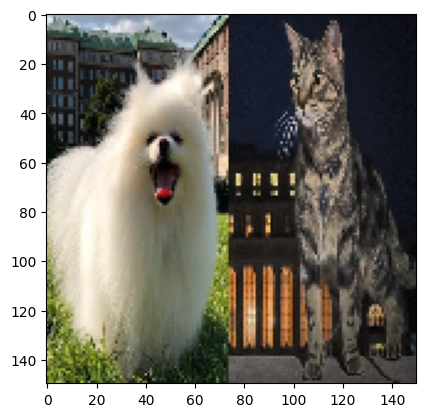

In [133]:
def display_image(id):
    fnames = [os.path.join("./img/test/cat", fname) for fname in os.listdir("./img/test/cat")]
    fnames += [os.path.join("./img/test/dog", fname) for fname in os.listdir("./img/test/dog")]
    img_path = fnames[id]
    print(img_path)
    img = image.load_img(img_path, target_size=(150, 150))
    img = image.img_to_array(img)

    plt.imshow(img / 255.)


confs = df.index[df['classes'] != df['predictions']].tolist()
print(confs)

display_image(47)